# Exercice 1: Création et manipulation d'une base de données simple
O. Kaufmann 2018, 2022.

<div class="alert alert-block alert-info">
    <b>Tip:</b> Exécuter une à une les cellules déjà présentes en prenant soin de comprendre leur contenu.<br>
    Compléter le notebook là où c'est nécessaire. Un encadré vert expliquant le complément attendu précède la section à compléter.
</div>

<div class="alert alert-block alert-warning">
    <b>Avertissement:</b><br> Ce notebook nécessite que votre environnement virtuel soit actif et à jour, vous aurez besoin des packages matplotlib, ipython-sql, pandas et eralchemy...<br>
</div> 

## @section | Initialisation du notebook

In [1]:
### @manage_solutions

### @subsection | Chargement des <i>packages</i> python

There should be a tip below...

### @tip
This is a test

### @tip
    <i>matplotlib</i> sert à créer des graphiques au départ de données<br>
    <i>pandas</i> sert à manipuler des tableaux<br>
    <i>render_er</i> sert à créer une représentation graphique de la base de données<br> 
    <i>SVG</i> sert à afficher des graphiques SVG dans le notebook

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from eralchemy import render_er
from IPython.display import SVG, Image

### @subsection | Chargement de l'extension sql pour jupyter et ouverture d'une base de donnée sqlite3

Charger l'extension de Jupyter pour traiter SQL

In [3]:
%load_ext sql

Obtenir de l'aide sur une fonction dans un notebook avec '?'

Effacer le fichier de la base de données si il existe...

### @tip
    Le point d'exclamation en début de ligne permet d'exécuter des commandes bash depuis le notebook

In [4]:
! rm example_db.db

Création d'une base de données vide (car elle n'existe pas puisqu'on vient d'effacer le fichier!)  
### @tip
    Si le fichier existait, on pourrait se connecter à la base existante de la même façon...

In [5]:
%sql sqlite:///example_db.db

## @subsection | Création des tables

In [6]:
%%sql 
CREATE TABLE ouvrages(
    nom TEXT PRIMARY KEY,
    commune TEXT  
);

 * sqlite:///example_db.db
Done.


[]

In [7]:
%%sql
CREATE TABLE piezometres(
    nom TEXT, 
    enregistreur TEXT,
    PRIMARY KEY(nom),
    FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE
);

 * sqlite:///example_db.db
Done.


[]

In [8]:
%%sql
CREATE TABLE puits_captages(
    nom TEXT,
    type_pompe TEXT,
    PRIMARY KEY(nom),
    FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE
);

 * sqlite:///example_db.db
Done.


[]

In [9]:
%%sql
CREATE TABLE prelevements(
    nom_puits TEXT,
    annee INTEGER,
    volume REAL,
    PRIMARY KEY(nom_puits, annee),
    FOREIGN KEY(nom_puits) REFERENCES puits_captages(nom) ON DELETE CASCADE
    );

 * sqlite:///example_db.db
Done.


[]

### @subsection | Afficher le schéma de la base de données sous forme graphique

### @tip
    render_er crée un fichier image au format ".png" du schéma de la base de données qui est ensuite affiché dans le notebook avec la méthode Image().
    Il est aussi possible de générer un schéma dans un fichier image vectoriel au format ".svg" (Scalable Vector Graphics). Le fichier ainsi créé peut être affiché avec la méthode SVG(). 

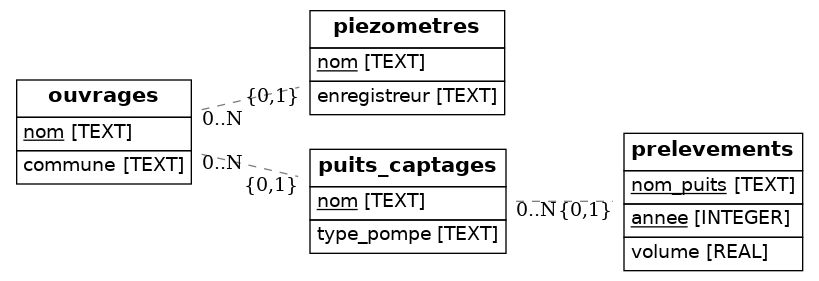

In [10]:
render_er('sqlite:///example_db.db', 'example_db_schema.png')
Image(filename='example_db_schema.png')

## @question
Ajouter la définition de la table "niveaux" reprenant les niveaux relevés dans les piezomètres.<br> 
Les champs seront nommés "nom_piezo", "date_releve" et "niveau".

In [11]:
# @solution @keep_output
%sql CREATE TABLE niveaux(nom_piezo TEXT, date_releve DATE, niveau REAL, PRIMARY KEY(nom_piezo, date_releve), FOREIGN KEY(nom_piezo) REFERENCES piezometres(nom) ON DELETE CASCADE); 

 * sqlite:///example_db.db
Done.


[]

## @subsection |  Activer de l'intégrité référentielle
<div class="alert alert-block alert-info">
    <b>Tip:</b> pour des raisons de rétro-compatibilité, l'intégrité référentielle n'est pas activée par défaut dans sqlite...
</div>  

In [12]:
%%sql
PRAGMA foreign_keys = ON;
PRAGMA foreign_keys;

 * sqlite:///example_db.db
Done.
Done.


foreign_keys
1


## @subsection | Afficher le schéma complété sous forme graphique

<div class="alert alert-block alert-success">
    Ajouter les commandes nécessaires pour afficher le schéma complété de la base de données en utilisant le format ".svg"
</div>  

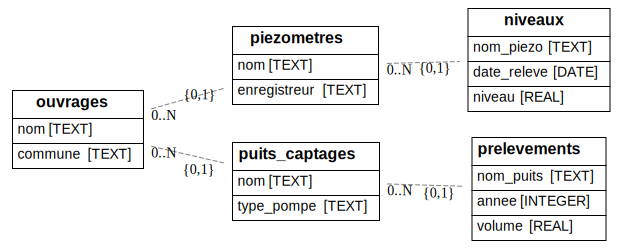

In [13]:
# @solution @reveal
# Draw schema from database
render_er('sqlite:///example_db.db', 'example_db_schema.svg')
SVG('example_db_schema.svg')

## @subsection | Afficher la liste des tables de la base de données
<div class="alert alert-block alert-info">
    <b>Tip:</b> sqlite_master est une table particulière dans laquelle SQLite stocke les informations propres à la structure de la base de données
</div>  

In [14]:
%%sql
SELECT name, sql FROM sqlite_master
WHERE type='table'
ORDER BY name;

 * sqlite:///example_db.db
Done.


name,sql
niveaux,"CREATE TABLE niveaux(nom_piezo TEXT, date_releve DATE, niveau REAL, PRIMARY KEY(nom_piezo, date_releve), FOREIGN KEY(nom_piezo) REFERENCES piezometres(nom) ON DELETE CASCADE)"
ouvrages,"CREATE TABLE ouvrages( nom TEXT PRIMARY KEY, commune TEXT )"
piezometres,"CREATE TABLE piezometres( nom TEXT, enregistreur TEXT, PRIMARY KEY(nom), FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE)"
prelevements,"CREATE TABLE prelevements( nom_puits TEXT, annee INTEGER, volume REAL, PRIMARY KEY(nom_puits, annee), FOREIGN KEY(nom_puits) REFERENCES puits_captages(nom) ON DELETE CASCADE )"
puits_captages,"CREATE TABLE puits_captages( nom TEXT, type_pompe TEXT, PRIMARY KEY(nom), FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE)"


## @subsection | Insérer des données

In [15]:
%%sql
INSERT INTO ouvrages VALUES('A','Beloeil');

 * sqlite:///example_db.db
1 rows affected.


[]

<div class="alert alert-block alert-success">
    Insérer le fait que la pompe installée dans le captage A est du type RK822W
</div>  

In [16]:
# @solution @reveal
%sql INSERT INTO puits_captages ('nom','type_pompe') VALUES ('A','RK822W');

 * sqlite:///example_db.db
1 rows affected.


[]

<div class="alert alert-block alert-success">
    Vérifier que l'information a bien été ajoutée
</div>  

In [17]:
# @solution @reveal
%sql SELECT * FROM puits_captages;

 * sqlite:///example_db.db
Done.


nom,type_pompe
A,RK822W


## @subsection | Effacer un enregistrement et ceux qui y sont liés en cascade

In [18]:
%%sql
DELETE FROM ouvrages WHERE nom='A';

 * sqlite:///example_db.db
1 rows affected.


[]

<div class="alert alert-block alert-success">
    Ecrire une requête pour contrôler que l'integrité référentielle a bien fonctionné
</div>  

In [19]:
# @solution @reveal
%sql SELECT * FROM puits_captages;

 * sqlite:///example_db.db
Done.


nom,type_pompe


## @subsection | Insertion des valeurs dans la table des ouvrages

In [20]:
%%sql
INSERT INTO ouvrages VALUES('A','Beloeil');
INSERT INTO ouvrages VALUES('B','Mons');
INSERT INTO ouvrages VALUES('C','Quevaucamps');
INSERT INTO ouvrages VALUES('D','Ciply');
INSERT INTO ouvrages VALUES('E','Hyon');

 * sqlite:///example_db.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [21]:
%%sql 
SELECT * FROM ouvrages;

 * sqlite:///example_db.db
Done.


nom,commune
A,Beloeil
B,Mons
C,Quevaucamps
D,Ciply
E,Hyon


## @subsection | Insertion de valeurs dans la table des puits de captage

<div class="alert alert-block alert-success">
    Ecrire une requête pour afficher le contenu de la table puits_captages
</div>

In [22]:
# @question
%sql SELECT * FROM puits_captages;

 * sqlite:///example_db.db
Done.


nom,type_pompe


In [23]:
%%sql
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('A','RK822W');
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('B','RK622W');
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('C','ABB226');
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('D','6-DDR-3');
INSERT INTO puits_captages ('nom','type_pompe') VALUES ('E','RK822W');

 * sqlite:///example_db.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

<div class="alert alert-block alert-success">
    Ecrire une requête pour contrôler que l'ajout s'est bien passé
</div>

In [24]:
# @solution @keep_output
%sql SELECT * FROM puits_captages;

 * sqlite:///example_db.db
Done.


nom,type_pompe
A,RK822W
B,RK622W
C,ABB226
D,6-DDR-3
E,RK822W


## @subsection | Insertion de volumes captés

In [25]:
%%sql
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2014', 144208);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2015', 98537);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2016', 37145);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('B','2016', 178403);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('C','2016', 17528);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2017', 24454);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('B','2017', 224269);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('C','2017', 47364);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('D','2017', 341077);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('E','2017', 72354);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2018', 98759);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('B','2018', 517541);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('C','2018', 64);
INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('D','2018', 34717);

 * sqlite:///example_db.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

<div class="alert alert-block alert-success">
    Ajouter les volumes captés suivants pour l'année 2019:<br>
    <table style="width:30%">
      <tr>
        <th>Captage</th>
        <th>Volume</th>
      </tr>
      <tr>
        <td>A</td>
        <td>22354</td>
      </tr>
      <tr>
        <td>B</td>
        <td>174256</td>
      </tr>
            <tr>
        <td>C</td>
        <td>122634</td>
      </tr>
      <tr>
        <td>D</td>
        <td>374456</td>
      </tr>
    </table> 
</div>  

In [26]:
# @solution @reveal
%sql INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('A','2019', 22354);
%sql INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('B','2019', 174256);
%sql INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('C','2019', 122364);
%sql INSERT INTO prelevements ('nom_puits', 'annee', 'volume') VALUES ('D','2019', 374456);

 * sqlite:///example_db.db
1 rows affected.
 * sqlite:///example_db.db
1 rows affected.
 * sqlite:///example_db.db
1 rows affected.
 * sqlite:///example_db.db
1 rows affected.


[]

<div class="alert alert-block alert-success">
    Ecrire une requête pour calculer la somme des volumes captés en 2018
</div>  

In [27]:
# @solution @reveal
%sql SELECT sum(volume) FROM prelevements WHERE annee=2018;

 * sqlite:///example_db.db
Done.


sum(volume)
651081.0


<div class="alert alert-block alert-success">
    Ecrire une requête calculer la somme, pour chacun des captages, des volumes captés entre début 2017 et fin 2019
</div>  

In [28]:
# @solution @reveal
%sql SELECT nom_puits, sum(volume) FROM prelevements WHERE annee BETWEEN 2017 AND 2019 GROUP BY nom_puits ORDER BY nom_puits;

 * sqlite:///example_db.db
Done.


nom_puits,sum(volume)
A,145567.0
B,916066.0
C,169792.0
D,750250.0
E,72354.0


## @Subsection | Utiliser pandas pour afficher l'historique des prélèvements sur le captage 'A'

<div class="alert alert-block alert-info">
    <b>Tip:</b> Grâce à l'extension ipython-sql, il est possible de récupérer la réponse à une requête SQL dans un dataframe pandas et d'utiliser le dataframe pour produire une sortie graphique. <br> Pour information, il est aussi possible d'interroger directement une base de données avec pandas via une requête sql (cf. <code>pd.read_sql(...)</code>)
</div>  

<div class="alert alert-block alert-success">
    Ecrire une requête calculer la somme, pour chacun des captages, des volumes captés entre début 2017 et fin 2019
</div>  

 * sqlite:///example_db.db
Done.


<AxesSubplot:xlabel='annee'>

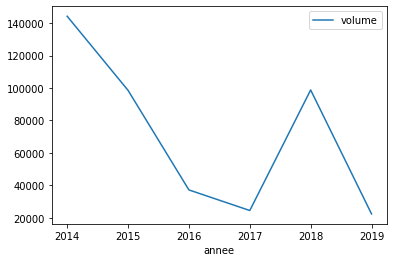

In [29]:
# @solution @reveal
out = %sql SELECT annee, volume FROM prelevements WHERE nom_puits='A' ORDER BY annee ASC;
df = out.DataFrame()
df.plot(x='annee', y='volume')

### Alternative

<AxesSubplot:xlabel='annee'>

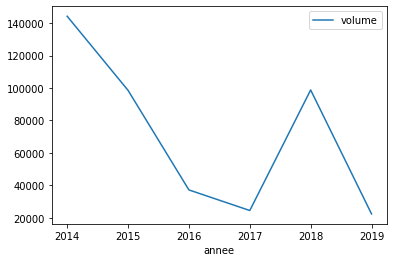

In [30]:
import sqlite3
sql_query = "SELECT annee, volume FROM prelevements WHERE nom_puits='A' ORDER BY annee ASC;"
db_connection = sqlite3.connect('example_db.db') 
df = pd.read_sql(sql_query, db_connection)
df.plot(x='annee', y='volume')

### Insertion des releves piezométriques

<div class="alert alert-block alert-success">
    Les enregistreurs suivants sont présents dans les piezomètres:<br>   
    <table style="width:50%">
      <tr>
        <th>Piezomètre</th>
        <th>Commune</th>
        <th>Type d'enregistreur</th>
      </tr>
      <tr>
        <td>F</td>
        <td>Mons</td>
        <td>SLB-Diver</td>
      </tr>
      <tr>
        <td>G</td>
        <td>Harmignies</td>
        <td>SLB-Diver</td>
      </tr>
      <tr>
        <td>H</td>
        <td>Genly</td>
        <td>SLB-Diver-2</td>
      </tr>
      <tr>
        <td>I</td>
        <td>Flénu</td>
        <td>SLB-Diver</td>
      </tr>
      <tr>
        <td>J</td>
        <td>Cuesmes</td>
        <td>SLB-Diver-2</td>
      </tr>
    </table> <br>
    Entrer ces données dans la base de données
</div>  

In [31]:
# @solution @reveal
%sql INSERT INTO ouvrages VALUES('F','Mons');
%sql INSERT INTO ouvrages VALUES('G','Harmignies');
%sql INSERT INTO ouvrages VALUES('H','Genly');
%sql INSERT INTO ouvrages VALUES('I','Flénu');
%sql INSERT INTO ouvrages VALUES('J','Cuesmes');

 * sqlite:///example_db.db
1 rows affected.
 * sqlite:///example_db.db
1 rows affected.
 * sqlite:///example_db.db
1 rows affected.
 * sqlite:///example_db.db
1 rows affected.
 * sqlite:///example_db.db
1 rows affected.


[]

### Insertion de valeurs dans la table des piézomètres

In [32]:
%%sql
INSERT INTO piezometres ('nom','enregistreur') VALUES ('F','SLB-Diver');
INSERT INTO piezometres ('nom','enregistreur') VALUES ('G','SLB-Diver');
INSERT INTO piezometres ('nom','enregistreur') VALUES ('H','SLB-Diver-2');
INSERT INTO piezometres ('nom','enregistreur') VALUES ('I','SLB-Diver');
INSERT INTO piezometres ('nom','enregistreur') VALUES ('J','SLB-Diver-2');

 * sqlite:///example_db.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [33]:
%%sql
SELECT * FROM piezometres;

 * sqlite:///example_db.db
Done.


nom,enregistreur
F,SLB-Diver
G,SLB-Diver
H,SLB-Diver-2
I,SLB-Diver
J,SLB-Diver-2


In [34]:
%%sql
INSERT INTO piezometres ('nom','enregistreur') VALUES ('E','SLB-Diver-CTD');

 * sqlite:///example_db.db
1 rows affected.


[]

### Insertion de niveaux enregistrés

In [35]:
%%sql
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2016-04-27', '23.4');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('G','2016-02-17', '22.3');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('I','2016-07-19', '22.8');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2016-09-07', '23.4');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2016-11-13', '21.3');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2017-02-28', '20.1');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('H','2017-02-17', '36.6');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('H','2018-06-27', '36.1');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('G','2016-09-22', '21.0');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('G','2017-02-22', '21.0');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2017-07-04', '19.6');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2017-10-14', '20.5');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2017-12-11', '23.4');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2018-05-17', '19.2');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2018-08-14', '21.9');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2018-12-09', '22.7');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2019-02-17', '23.9');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('F','2019-07-29', '22.5');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2018-12-17', '48.1');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2019-01-21', '42.4');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2019-07-12', '40.7');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2019-08-01', '39.9');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2019-10-22', '37.1');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2017-11-09', '38.9');
INSERT INTO niveaux ('nom_piezo', 'date_releve', 'niveau') VALUES ('E','2020-01-20', '40.5');

 * sqlite:///example_db.db
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [36]:
%%sql
SELECT * FROM niveaux ORDER BY nom_piezo, date_releve;

 * sqlite:///example_db.db
Done.


nom_piezo,date_releve,niveau
E,2017-11-09,38.9
E,2018-12-17,48.1
E,2019-01-21,42.4
E,2019-07-12,40.7
E,2019-08-01,39.9
E,2019-10-22,37.1
E,2020-01-20,40.5
F,2016-04-27,23.4
F,2016-09-07,23.4
F,2016-11-13,21.3


### Rechercher les enregistreurs installés dans les piezomètres ainsi que tous les niveaux enregistrés

<div class="alert alert-block alert-success">
    Ecrire une requête premettant d'afficher pour chaque piézomètre le type d'enregistreur installé et les niveaux relevés
</div>  

In [37]:
%%sql
SELECT nom, enregistreur, date_releve, niveau FROM piezometres LEFT JOIN niveaux ON piezometres.nom=niveaux.nom_piezo ORDER BY nom_piezo, date_releve;

 * sqlite:///example_db.db
Done.


nom,enregistreur,date_releve,niveau
J,SLB-Diver-2,None,None
E,SLB-Diver-CTD,2017-11-09,38.9
E,SLB-Diver-CTD,2018-12-17,48.1
E,SLB-Diver-CTD,2019-01-21,42.4
E,SLB-Diver-CTD,2019-07-12,40.7
E,SLB-Diver-CTD,2019-08-01,39.9
E,SLB-Diver-CTD,2019-10-22,37.1
E,SLB-Diver-CTD,2020-01-20,40.5
F,SLB-Diver,2016-04-27,23.4
F,SLB-Diver,2016-09-07,23.4


### Utiliser pandas pour afficher l'historique des relevés sur  différents piézomètres
<div class="alert alert-block alert-info">
    <b>Tip:</b> Grâce à l'extension ipython-sql, il est possible de récupérer la réponse à une requête SQL dans un dataframe pandas et d'utiliser le dataframe pour produire une sortie graphique. <br> Pour information, il est aussi possible d'interroger directement une base de données avec pandas via une requête sql (cf. <code>pd.read_sql(...)</code>)
</div>  

Afficher un graphique de l'évolution temporelle des niveaux dans le pizéomètre F

In [38]:
out = %sql SELECT date_releve, niveau FROM piezometres INNER JOIN niveaux ON piezometres.nom=niveaux.nom_piezo WHERE piezometres.nom=='F' ORDER BY date_releve;
df = out.DataFrame()

 * sqlite:///example_db.db
Done.


In [39]:
df.head()

,date_releve,niveau
0,2016-04-27,23.4
1,2016-09-07,23.4
2,2016-11-13,21.3
3,2017-02-28,20.1
4,2017-07-04,19.6


In [40]:
df['date_releve'] = pd.to_datetime(df['date_releve'])
df.set_index('date_releve', inplace=True)

Text(0, 0.5, 'niveau [m]')

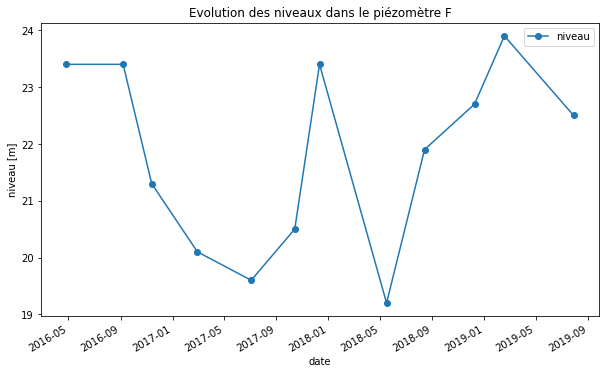

In [41]:
fig, ax = plt.subplots(figsize=(10,6))
df.plot(title='Evolution des niveaux dans le piézomètre F', ax=ax, style='o-')
ax.set_xlabel("date")
ax.set_ylabel("niveau [m]")

<div class="alert alert-block alert-success">
    Ecrire une requête et le code python associé pour afficher un graphique montrant au cours du temps les niveaux inférieurs à 40m dans les relevés du pizéomètre E 
</div>  

In [42]:
out = %sql SELECT date_releve, niveau FROM piezometres INNER JOIN niveaux ON piezometres.nom=niveaux.nom_piezo WHERE piezometres.nom=='E' AND niveau<40. ORDER BY date_releve;
df = out.DataFrame()

 * sqlite:///example_db.db
Done.


In [43]:
df.head()

,date_releve,niveau
0,2017-11-09,38.9
1,2019-08-01,39.9
2,2019-10-22,37.1


In [44]:
df['date_releve'] = pd.to_datetime(df['date_releve'])
df.set_index('date_releve', inplace=True)

Text(0, 0.5, 'niveau [m]')

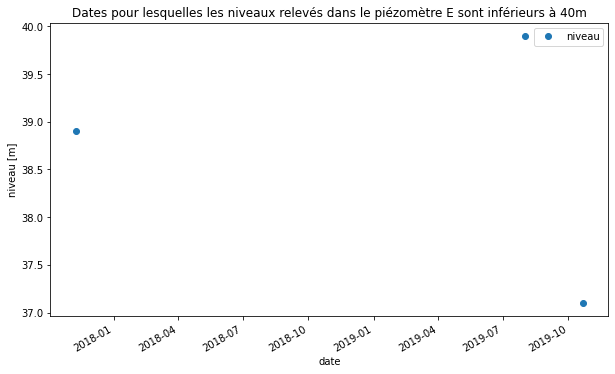

In [45]:
fig, ax = plt.subplots(figsize=(10,6))
df.plot(title='Dates pour lesquelles les niveaux relevés dans le piézomètre E sont inférieurs à 40m', ax=ax, style='o')
ax.set_xlabel("date")
ax.set_ylabel("niveau [m]")